# WeatherPy
*Created by Dale Currigan, April 2021*
  
**Instructions:**  
  
Select *Restart & Run All* from the Kernel menu  
Then scroll down or use the navigation links below:  

[Observations & Conclusions](#observations)    
[Dataset Creation and Cleaning](#dataset)   
[Regression and Plotting Function](#reg_and_plot)  
[Temperature vs Latitude Analysis](#temp)  
[Humidity vs Latitude Analysis](#humidity)  
[Cloudiness vs Latitude Analysis](#cloudiness)  
[Wind Speed vs Latitude Analysis](#wind)  

<a id='observations'></a>
## Observations and Conclusions 

1. Temperatures do increase as the latitude approaches the equator. This is demonstrated visually on the scatter plot of temperature vs latitude, which shows a convergence towards higher temperatures as both the northern and southern hemisphere latitudes approach 0 degrees (the equator). 
2. There is a strong correlation between both northern and southern hemisphere latitude and temperature. This is evidenced by the high Pearson correlation coeffecient caluclated for both. The association is stronger for the northern hemisphere. It is negatively correlated for the northern hemisphere, and positively correlated for the southern hemisphere. This is due to the positive and negetive values for latitude in the respective hemispheres.   
3. Humidity, Cloudiness and Wind Speed are not well correlated with latitude. A broad range of values are present at all latitudes and the Pearson correlation coefficients are all low. 
4. The cloudiness data regression is heavilly influenced by a clustering of values at 0% and 100% cloud cover, for all latitudes in the data. This makes the likelihood of a linear relationship exisiting between cloudiness and latitude very unlikely. 

In [1]:
# Import libraries  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import pprint as pprint
from random import uniform
from config import api_key
from scipy.stats import linregress
from citipy import citipy
from datetime import datetime


<a id='dataset'></a>
## Dataset Creation and Cleaning  

In [2]:
# Create a list of unique city names based on random lat/long coordinates and using the citipy module 
city_list = []
while (len(city_list) < 1000):
    geo_position = (uniform(-90, 90), uniform(-180, 180))
    city = citipy.nearest_city(geo_position[0], geo_position[1]).city_name

    if city not in city_list:
        city_list.append(city)

# Create an empty dataframe to store the weather relevant weather data
city_data = pd.DataFrame(columns={"Name", "Lat", "Long", "Temp", "Humidity", "Cloudiness", "Windspeed",
                                  "Country", "Datetime"})

# Create counters for the record numbers and percentage complete
record=1
percent_done = 0

# Iterate through the city list, calling the api for that city and checking for the data required
for city in city_list:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={api_key}"
    response = requests.get(url).json()
    
    # If the city is present in the database data will be returned and appended to the dataframe
    try:
        new_city = pd.DataFrame({"Name":response['name'], "Lat":response['coord']['lat'], "Long":response['coord']['lon'], 
                                 "Temp":response['main']['temp_max'], "Humidity":response['main']['humidity'],
                                 "Cloudiness":[response['clouds']['all']], "Windspeed":response['wind']['speed'],
                                 "Country":response['sys']['country'], "Datetime":response['dt']})
        
        percent_done = round((record/600*100),0) # target 600 records as testing suggests around 50 cities  
                                                 # not found each run 
        
        print(f"Processing city {record}:  {city.upper()} ................ FOUND, data appended. {percent_done}% complete")
        city_data = city_data.append(new_city)
        
    # If the city is absent an exception is run, and user informed of the missing record    
    except:
        print(f"Processing city {record}:  {city.upper()} ................ CITY NOT FOUND, skipping")
        next
    
    record += 1
    if percent_done > 100:
        break
             
# Rearrange column order and export to csv
city_data = city_data[["Name", "Lat", "Long", "Temp", "Humidity", "Cloudiness", "Windspeed", "Country", "Datetime"]]
city_data.to_csv("../Output/weather_data.csv", index=False)
date_time = datetime.now().strftime('%d-%m-%Y at %H:%M')

# Inform user that data collection is complete and display the df
print("")
print(f"Data retrieval complete. Weather data for {len(city_data)} cities on the {date_time}, is now stored for analysis")
print("Data has been exported to weather_data.csv")
city_data


Processing city 1:  NOME ................ FOUND, data appended. 0.0% complete
Processing city 2:  USHUAIA ................ FOUND, data appended. 0.0% complete
Processing city 3:  WESTPORT ................ FOUND, data appended. 0.0% complete
Processing city 4:  KHATANGA ................ FOUND, data appended. 1.0% complete
Processing city 5:  BLUFF ................ FOUND, data appended. 1.0% complete
Processing city 6:  ALICE SPRINGS ................ FOUND, data appended. 1.0% complete
Processing city 7:  HERMANUS ................ FOUND, data appended. 1.0% complete
Processing city 8:  WAINGAPU ................ FOUND, data appended. 1.0% complete
Processing city 9:  PUNTA ARENAS ................ FOUND, data appended. 2.0% complete
Processing city 10:  RIKITEA ................ FOUND, data appended. 2.0% complete
Processing city 11:  KACHUG ................ FOUND, data appended. 2.0% complete
Processing city 12:  SVETLYY ................ FOUND, data appended. 2.0% complete
Processing city 

Processing city 101:  NOVA OLIMPIA ................ FOUND, data appended. 17.0% complete
Processing city 102:  CAPE TOWN ................ FOUND, data appended. 17.0% complete
Processing city 103:  OKTYABRSKAYA ................ CITY NOT FOUND, skipping
Processing city 104:  GODERICH ................ FOUND, data appended. 17.0% complete
Processing city 105:  PEVEK ................ FOUND, data appended. 18.0% complete
Processing city 106:  HUE ................ FOUND, data appended. 18.0% complete
Processing city 107:  BUSSELTON ................ FOUND, data appended. 18.0% complete
Processing city 108:  IQUITOS ................ FOUND, data appended. 18.0% complete
Processing city 109:  COIHAIQUE ................ FOUND, data appended. 18.0% complete
Processing city 110:  HONNINGSVAG ................ FOUND, data appended. 18.0% complete
Processing city 111:  ALBEMARLE ................ FOUND, data appended. 18.0% complete
Processing city 112:  KORLA ................ FOUND, data appended. 19.0

Processing city 200:  SALALAH ................ FOUND, data appended. 33.0% complete
Processing city 201:  PACIFIC GROVE ................ FOUND, data appended. 34.0% complete
Processing city 202:  TUKTOYAKTUK ................ FOUND, data appended. 34.0% complete
Processing city 203:  FUKUE ................ FOUND, data appended. 34.0% complete
Processing city 204:  ESPERANCE ................ FOUND, data appended. 34.0% complete
Processing city 205:  LEBU ................ FOUND, data appended. 34.0% complete
Processing city 206:  NYURBA ................ FOUND, data appended. 34.0% complete
Processing city 207:  SAINT ANTHONY ................ FOUND, data appended. 34.0% complete
Processing city 208:  PORTO NOVO ................ FOUND, data appended. 35.0% complete
Processing city 209:  GRENADA ................ FOUND, data appended. 35.0% complete
Processing city 210:  BRAE ................ FOUND, data appended. 35.0% complete
Processing city 211:  CHEUSKINY ................ CITY NOT FOUND,

Processing city 299:  BUTARITARI ................ FOUND, data appended. 50.0% complete
Processing city 300:  ILULISSAT ................ FOUND, data appended. 50.0% complete
Processing city 301:  SAINT-PHILIPPE ................ FOUND, data appended. 50.0% complete
Processing city 302:  KALMESHWAR ................ FOUND, data appended. 50.0% complete
Processing city 303:  KARLSHAMN ................ FOUND, data appended. 50.0% complete
Processing city 304:  MANINGRIDA ................ FOUND, data appended. 51.0% complete
Processing city 305:  WILLOWMORE ................ FOUND, data appended. 51.0% complete
Processing city 306:  HAVOYSUND ................ FOUND, data appended. 51.0% complete
Processing city 307:  KOUNGOU ................ FOUND, data appended. 51.0% complete
Processing city 308:  SIOUX LOOKOUT ................ FOUND, data appended. 51.0% complete
Processing city 309:  HAVIXBECK ................ FOUND, data appended. 52.0% complete
Processing city 310:  NECOCHEA ............

Processing city 396:  CLYDE RIVER ................ FOUND, data appended. 66.0% complete
Processing city 397:  ABAY ................ FOUND, data appended. 66.0% complete
Processing city 398:  ALGIERS ................ FOUND, data appended. 66.0% complete
Processing city 399:  LETICIA ................ FOUND, data appended. 66.0% complete
Processing city 400:  KATHU ................ FOUND, data appended. 67.0% complete
Processing city 401:  SOLNECHNYY ................ FOUND, data appended. 67.0% complete
Processing city 402:  CANICO ................ FOUND, data appended. 67.0% complete
Processing city 403:  NELSON BAY ................ FOUND, data appended. 67.0% complete
Processing city 404:  TASHTYP ................ FOUND, data appended. 67.0% complete
Processing city 405:  BILIBINO ................ FOUND, data appended. 68.0% complete
Processing city 406:  PUERTO COLOMBIA ................ FOUND, data appended. 68.0% complete
Processing city 407:  KIAMA ................ FOUND, data append

Processing city 495:  NANORTALIK ................ FOUND, data appended. 82.0% complete
Processing city 496:  AWBARI ................ FOUND, data appended. 83.0% complete
Processing city 497:  DEPUTATSKIY ................ FOUND, data appended. 83.0% complete
Processing city 498:  TIZNIT ................ FOUND, data appended. 83.0% complete
Processing city 499:  IBRA ................ FOUND, data appended. 83.0% complete
Processing city 500:  FILADELFIA ................ FOUND, data appended. 83.0% complete
Processing city 501:  JINAN ................ FOUND, data appended. 84.0% complete
Processing city 502:  CHEBENKI ................ FOUND, data appended. 84.0% complete
Processing city 503:  GORONTALO ................ FOUND, data appended. 84.0% complete
Processing city 504:  ALAMOSA ................ FOUND, data appended. 84.0% complete
Processing city 505:  MANAVALAKURICHI ................ FOUND, data appended. 84.0% complete
Processing city 506:  NYBRO ................ FOUND, data appen

Processing city 594:  NANTUCKET ................ FOUND, data appended. 99.0% complete
Processing city 595:  HAMBANTOTA ................ FOUND, data appended. 99.0% complete
Processing city 596:  CAMPBELTOWN ................ FOUND, data appended. 99.0% complete
Processing city 597:  KHILOK ................ FOUND, data appended. 100.0% complete
Processing city 598:  HUILONG ................ FOUND, data appended. 100.0% complete
Processing city 599:  BARCELOS ................ FOUND, data appended. 100.0% complete
Processing city 600:  MUJIAYINGZI ................ FOUND, data appended. 100.0% complete
Processing city 601:  JAMUI ................ FOUND, data appended. 100.0% complete
Processing city 602:  KIROVSKIY ................ FOUND, data appended. 100.0% complete
Processing city 603:  AKSU ................ FOUND, data appended. 100.0% complete
Processing city 604:  SOLA ................ FOUND, data appended. 101.0% complete

Data retrieval complete. Weather data for 545 cities on the 

,Name,Lat,Long,Temp,Humidity,Cloudiness,Windspeed,Country,Datetime
0,Nome,64.5011,-165.4064,35.60,75,1,3.44,US,1619246028
0,Ushuaia,-54.8000,-68.3000,41.00,93,75,3.44,AR,1619246028
0,Westport,41.1415,-73.3579,50.00,66,1,8.05,US,1619246029
0,Khatanga,71.9667,102.5000,33.03,99,100,16.91,RU,1619246029
0,Bluff,-46.6000,168.3333,48.99,86,7,1.01,NZ,1619246029
...,...,...,...,...,...,...,...,...,...
0,Mujiayingzi,42.1167,118.7833,54.97,52,96,9.75,CN,1619246158
0,Jamūī,24.9167,86.2167,106.75,7,69,9.37,IN,1619246134
0,Kirovskiy,45.0917,133.5136,42.28,64,100,6.29,RU,1619246159
0,Aksu,41.1231,80.2644,60.03,28,26,2.75,CN,1619246159


In [3]:
# DATA CLEANING / SORTING

# Remove any cities with humidity >100%
city_data = city_data[city_data['Humidity'] <= 100]

# Change data type of humidity and cloudiness columns to integer
city_data[['Humidity', 'Cloudiness']] = city_data[['Humidity', 'Cloudiness']].astype(int)

# Create dataframes for the northern and southern hemisphere data
n_hem = city_data[city_data['Lat'] >= 0]
s_hem = city_data[city_data['Lat'] < 0]



<a id='reg_and_plot'></a>
## Regression and Plotting Function

In [4]:
# Function for performing linear regression and plotting results
def regress_and_plot(data, x_values, y_values, x_column, colour):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values)

    # Create a df containing the regression values 
    reg_y = x_values * slope + intercept
    regress_values = pd.DataFrame({x_column:x_values, "Reg Y": reg_y})

    # Create strings for equation and r-squared
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared =  "r$^{ 2}$=  " + str(round(rvalue**2,4))

    # Plot the scatter plot and regression values
    new_plot = data.plot.scatter(x=x_column, y='Lat', color=colour, alpha=0.5, figsize=(12,8), edgecolor='black')
    regress_values.plot(x=x_column, y='Reg Y', color='b', legend=False, ax=new_plot, linestyle='--', alpha=0.6)
    
    return rvalue, line_eq, r_squared



<a id='temp'></a>
## Temperature vs Latitude Analysis 
  

### Scatter Plot 

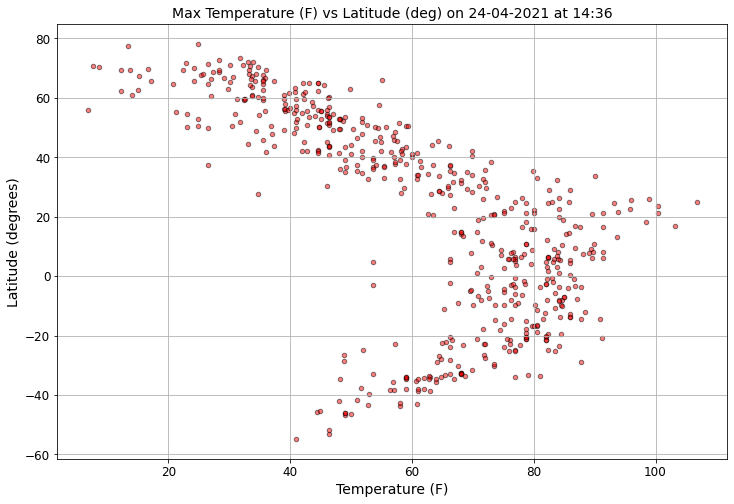

In [5]:
plot_1 = city_data.plot.scatter(x="Temp", y='Lat', color='r', alpha=0.5, figsize=(12,8), edgecolor='black', grid=True)

# Formatting and Display
plt.title(f"Max Temperature (F) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../Output/temp_scatter.png')
plt.show()

### Linear Regression - Northern Hemisphere Cities

The Pearson correlation coefficient (r) is: -0.871


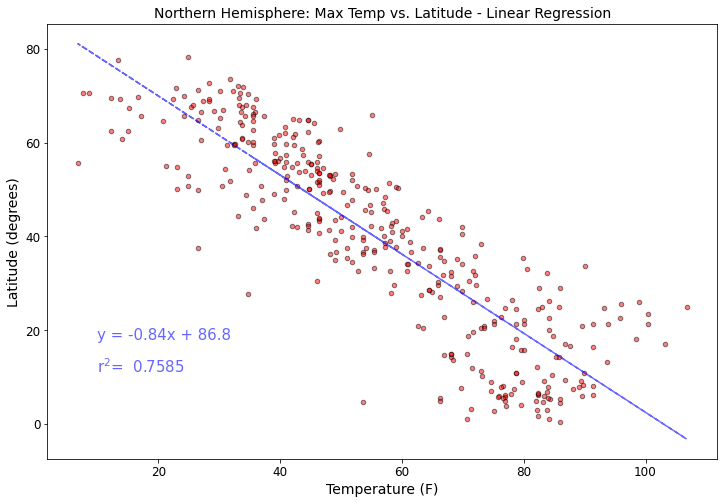

In [6]:
x_values = n_hem['Temp']
y_values = n_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(n_hem, x_values, y_values, "Temp", "r")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Northern Hemisphere: Max Temp vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (10,18), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (10,11), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/temp_northern_reg.png')
plt.show()

### Linear Regression - Southern Hemisphere Cities

The Pearson correlation coefficient (r) is: 0.736


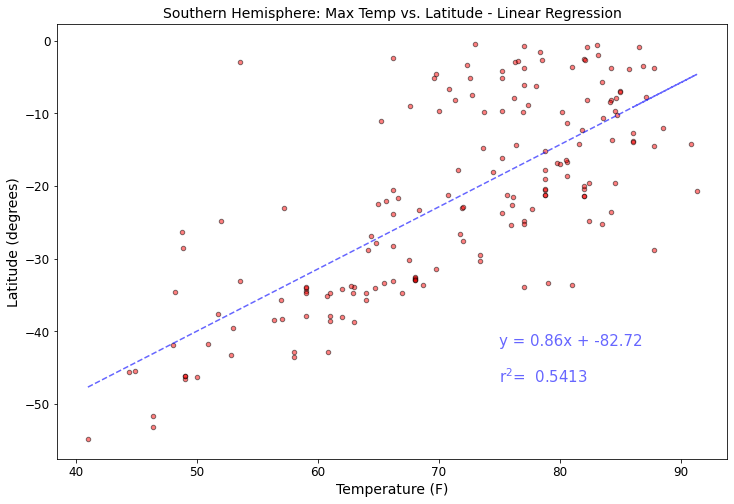

In [7]:
# Perform linear regression
x_values = s_hem['Temp']
y_values = s_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(s_hem, x_values, y_values, "Temp", "r")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Southern Hemisphere: Max Temp vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (75,-42), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (75,-47), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/temp_southern_reg.png')
plt.show()

<a id='humidity'></a>
## Humidity vs Latitude Analysis 

### Scatter Plot 

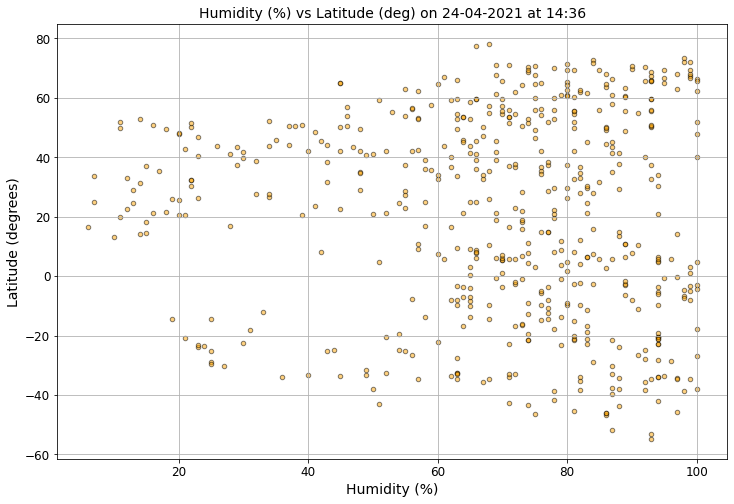

In [8]:
plot_2 = city_data.plot.scatter(x="Humidity", y='Lat', color='orange', alpha=0.5, figsize=(12,8),edgecolor='black', grid=True)

# Formatting and display
plt.title(f"Humidity (%) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../Output/humidity_scatter.png')
plt.show()

### Linear Regression - Northern Hemisphere Cities

The Pearson correlation coefficient (r) is: 0.143


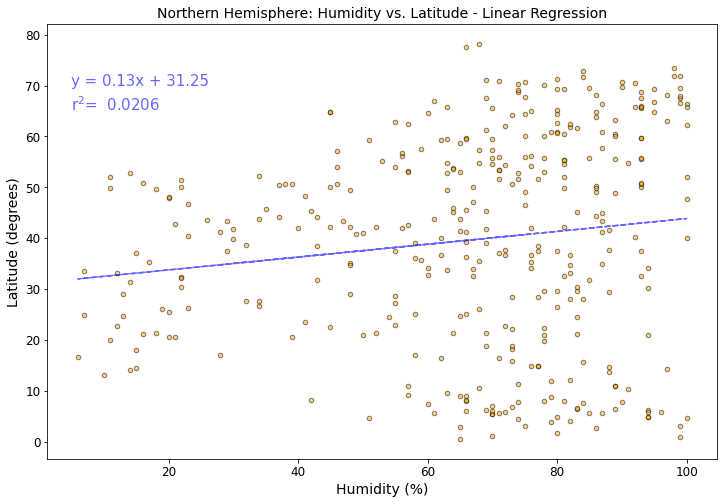

In [9]:
# Perform linear regression
x_values = n_hem['Humidity']
y_values = n_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(n_hem, x_values, y_values, "Humidity", "orange")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Northern Hemisphere: Humidity vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,70), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (5,65), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/humidity_northern_reg.png')
plt.show()

### Linear Regression - Southern Hemisphere Cities

The Pearson correlation coefficient (r) is: 0.027


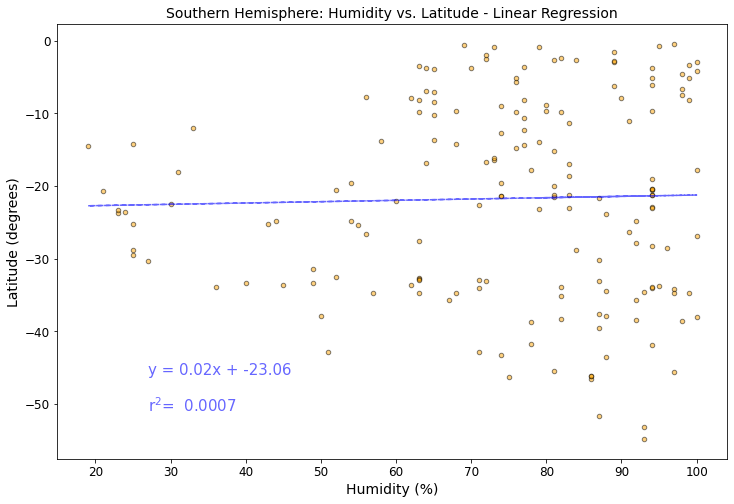

In [10]:
# Perform linear regression
x_values = s_hem['Humidity']
y_values = s_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(s_hem, x_values, y_values, "Humidity", "orange")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Southern Hemisphere: Humidity vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Humidity (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (27,-46), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (27,-51), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/humidity_southern_reg.png')
plt.show()

<a id='cloudiness'></a>
## Cloudiness  vs Latitude Analysis 

### Scatter Plot 

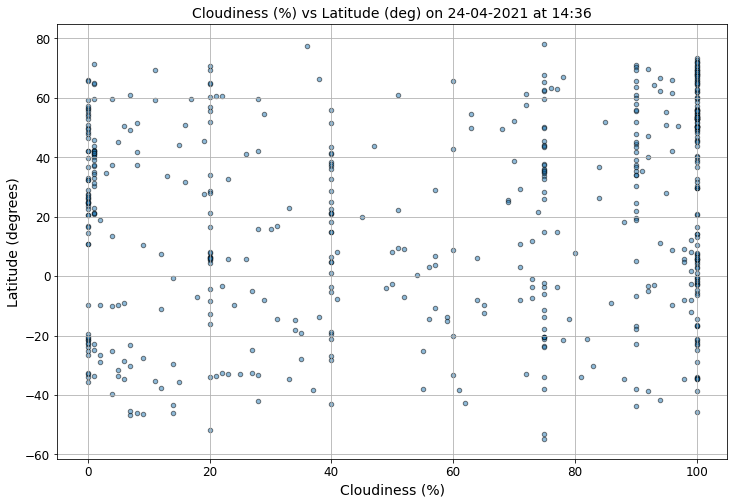

In [11]:
plot_3 = city_data.plot.scatter(x="Cloudiness", y='Lat', alpha=0.5, figsize=(12,8), edgecolor='black', grid=True)

# Formatting and display
plt.title(f"Cloudiness (%) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../Output/cloudiness_scatter.png')
plt.show()

### Linear Regression - Northern Hemisphere Cities

The Pearson correlation coefficient (r) is: 0.176


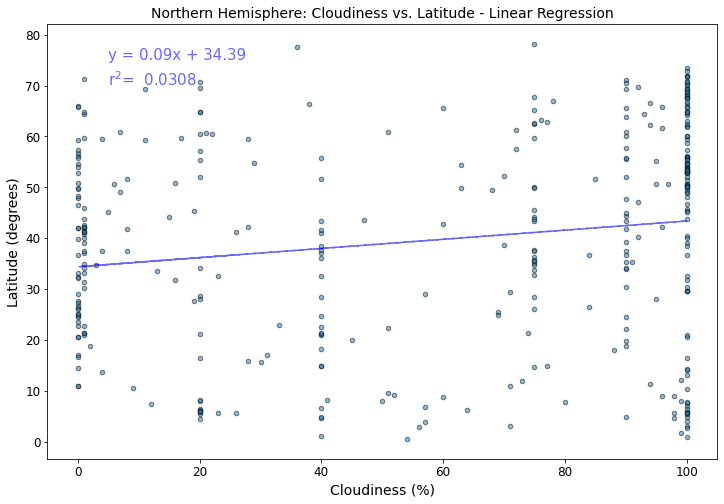

In [12]:
# Perform linear regression
x_values = n_hem['Cloudiness']
y_values = n_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(n_hem, x_values, y_values, "Cloudiness", "C0")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,75), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (5,70), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/cloudiness_northern_reg.png')
plt.show()

### Linear Regression - Southern Hemisphere Cities

The Pearson correlation coefficient (r) is: 0.243


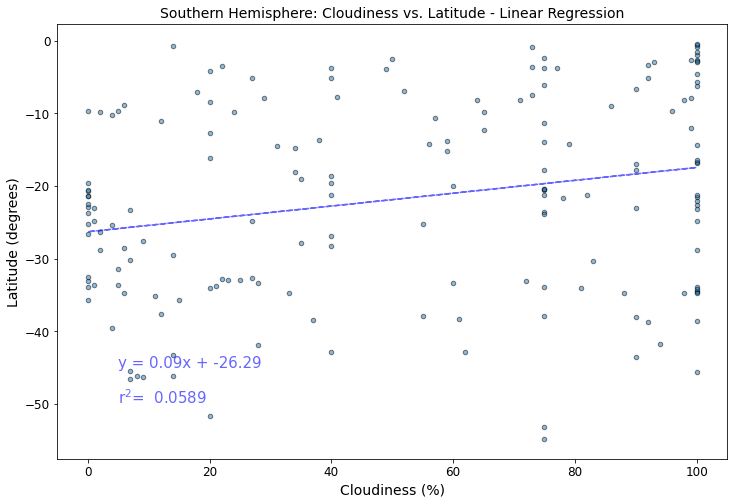

In [13]:
# Perform linear regression
x_values = s_hem['Cloudiness']
y_values = s_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(s_hem, x_values, y_values, "Cloudiness", "C0")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Cloudiness (%)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (5,-45), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (5,-50), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/cloudiness_southern_reg.png')
plt.show()

<a id='wind'></a>
## Wind Speed vs Latitude Analysis 

### Scatter Plot 

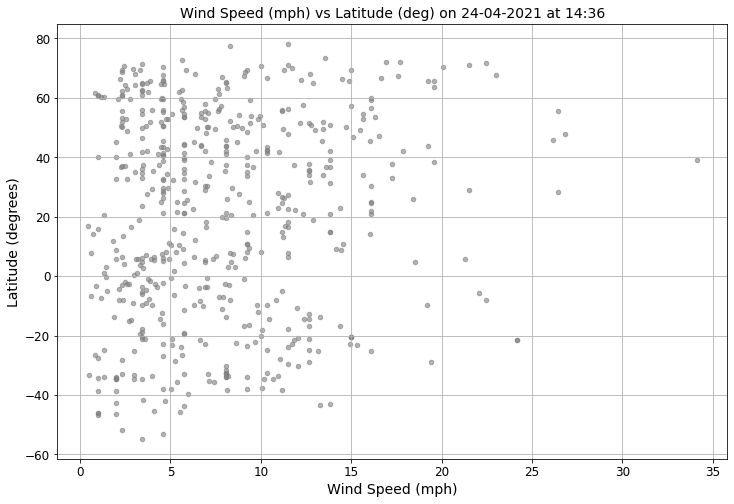

In [14]:
plot_4 = city_data.plot.scatter(x="Windspeed", y='Lat', color='gray', alpha=0.6, figsize=(12,8), grid=True)

# Formatting and display
plt.title(f"Wind Speed (mph) vs Latitude (deg) on {date_time}", fontsize=14)
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../Output/wind_scatter.png')
plt.show()

### Linear Regression - Northern Hemisphere Cities

The Pearson correlation coefficient (r) is: 0.088


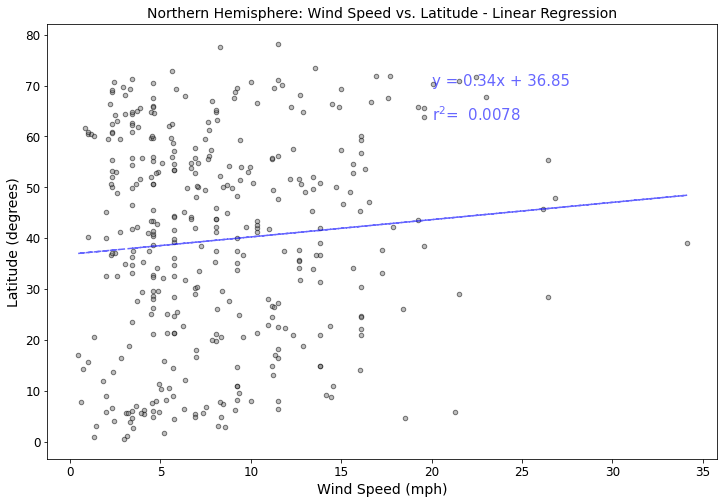

In [15]:
# Perform linear regression
x_values = n_hem['Windspeed']
y_values = n_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(n_hem, x_values, y_values, "Windspeed", "gray")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (20,70), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (20,63), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/wind_northern_reg.png')
plt.show()

### Linear Regression - Southern Hemisphere Cities

The Pearson correlation coefficient (r) is: 0.054


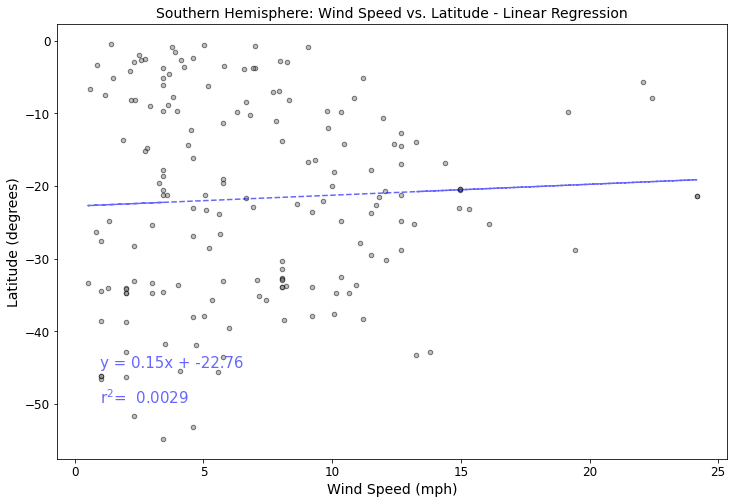

In [16]:
# Perform linear regression
x_values = s_hem['Windspeed']
y_values = s_hem['Lat']

# Call the regression and plotting function 
r, line_eq, r_squared = regress_and_plot(s_hem, x_values, y_values, "Windspeed", "gray")

# Formatting and display
print(f"The Pearson correlation coefficient (r) is: {round(r,3)}")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude - Linear Regression", fontsize=14 )
plt.xlabel('Wind Speed (mph)', fontsize=14)
plt.ylabel('Latitude (degrees)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.annotate(line_eq, (1,-45), fontsize=15, color="b", alpha=0.6)
plt.annotate(r_squared, (1,-50), fontsize=15, color="b", alpha=0.6)
plt.savefig('../Output/wind_southern_reg.png')
plt.show()